In [1]:
from HeaderP import *

In [110]:

def monoage(feh,r,age,agebin=np.linspace(0,14,8),xlims=[6,12],ylims=[-1.5,0.5]):
    colors = getcolor(range(len(agebin)+1), cm = plt.cm.get_cmap('plasma'))
    plt.figure(figsize=(20,8))
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        r_sing, feh_sing = zip(*sorted(zip(r[m], feh[m])))
        r_sing, feh_sing = np.array(r_sing, dtype=float), np.array(feh_sing, dtype=float)
        
        m2 = (r_sing>xlims[0])&(r_sing<xlims[1])
        r_sing = r_sing[m2]
        feh_sing = feh_sing[m2]
        
        r_ave, feh_ave = movingMed_time(r_sing, feh_sing, 2, 0.2)
        #feh_ave = gaussian_filter(feh_ave, 4)
        #plt.plot(r_sing, feh_sing,'.', color=colors[i], markersize=1)
        plt.plot(r_ave, feh_ave, color=colors[i], 
                 label='[%.2f Gyr, %.2f Gyr]'%(agebin[i],agebin[i+1]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3)
    plt.grid(color='grey', linestyle='-', linewidth=1)
    plt.xlabel('R [kpc]')
    plt.ylabel('[Fe/H]')
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    
    
def monoage_line(feh,r,age,agebin=np.linspace(0,14,8),xlims=[6,12],ylims=[-1.5,0.5]):
    colors = getcolor(range(len(agebin)+1), cm = plt.cm.get_cmap('plasma'))
    slopes = np.zeros(len(agebin)-1)
    fehscatter = np.zeros(len(agebin)-1)
    
    plt.figure(figsize=(20,8))
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        r_sing, feh_sing = zip(*sorted(zip(r[m], feh[m])))
        r_sing, feh_sing = np.array(r_sing, dtype=float), np.array(feh_sing, dtype=float)
        
        m2 = (r_sing>xlims[0])&(r_sing<xlims[1])
        p = fitpoints(r_sing[m2], feh_sing[m2]) 
        slopes[i] = p[1]
        fehscatter[i] = np.std(feh_sing[m2]-p(r_sing[m2]))
        plt.plot(r_sing[m2], p(r_sing[m2]), color=colors[i], 
                 label='[%.2f Gyr, %.2f Gyr]'%(agebin[i],agebin[i+1]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3)
    plt.xlabel('R [kpc]')
    plt.ylabel('[Fe/H]')
    plt.xlim(xlims)
    plt.ylim(ylims)
    return (agebin[:-1]+agebin[1:])/2, slopes, fehscatter
    

# Maosheng subgiant: https://www.nature.com/articles/s41586-022-04496-5

In [111]:
from astropy.io import ascii
data = ascii.read("../GaiaDR3/41586_2022_4496_MOESM3_ESM.txt")  
sub = data.to_pandas()

sub['col14'] = np.array(data['col14'].value, dtype=int)

sub = sub.rename(columns={'col1': 'number id', 'col2': 'ra',
                         'col3': 'dec','col4': 'age','col5': 'age_err',
                          'col6': 'feh','col7': 'feh_err','col8': 'Jr',
                          'col9': 'Jphi','col10': 'Jz','col11': 'X',
                          'col12': 'Y','col13': 'Z','col14': 'source_id',
                         'col15': 'specid','col16': 'snr','col17': 'teff',
                         'col18': 'teff_err','col19': 'logg',
                         'col20': 'logg_err','col21': 'k_mag',
                         'col22': 'k_mag_err','col23': 'k_mag_comb',
                         'col24': 'k_mag_comb_err','col25': 'alpha_fe',
                         'col26': 'alpha_fe_err'})

sub['R'] = np.sqrt(sub['X']**2+sub['Y']**2)
sub['feh'] = np.array(sub['feh'], dtype=float)
sub['age'] = np.array(sub['age'], dtype=float)

Text(0, 0.5, 'Metallicity Scatter')

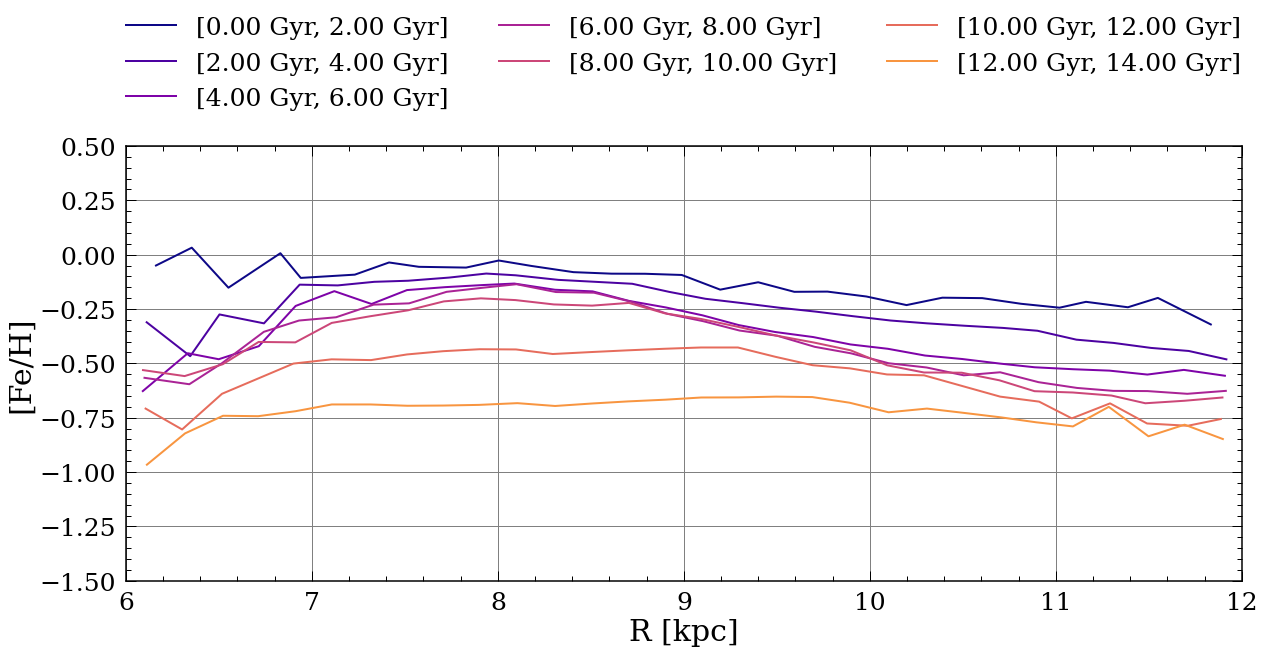

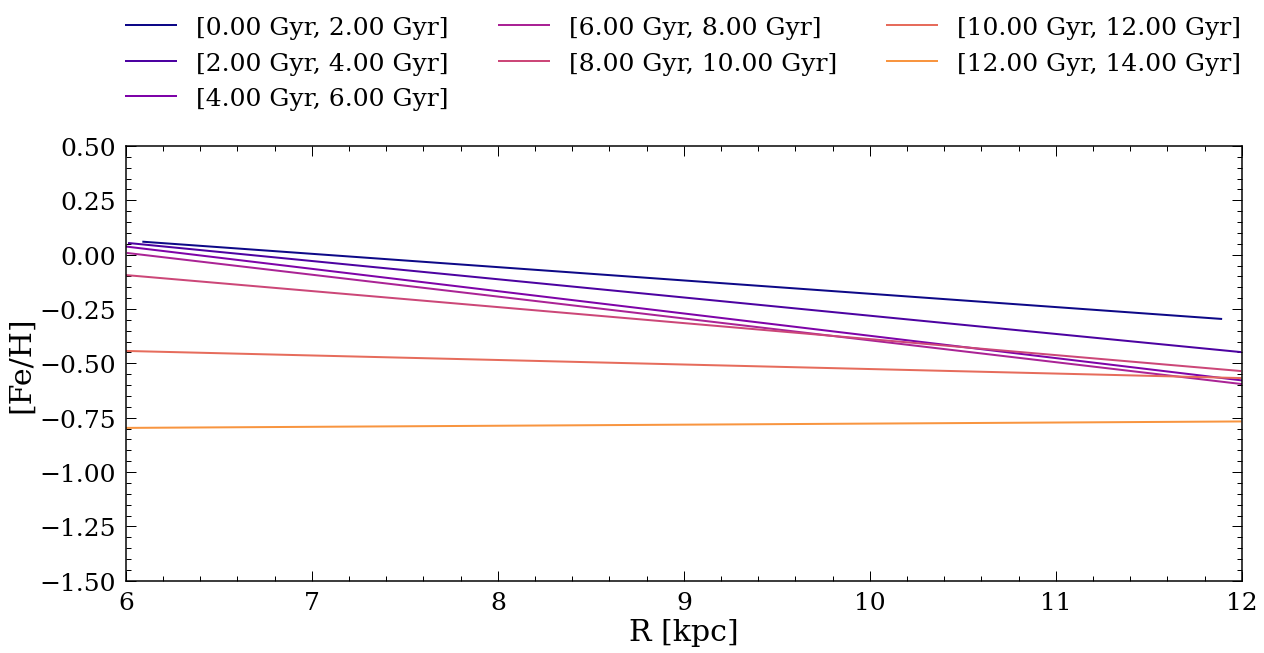

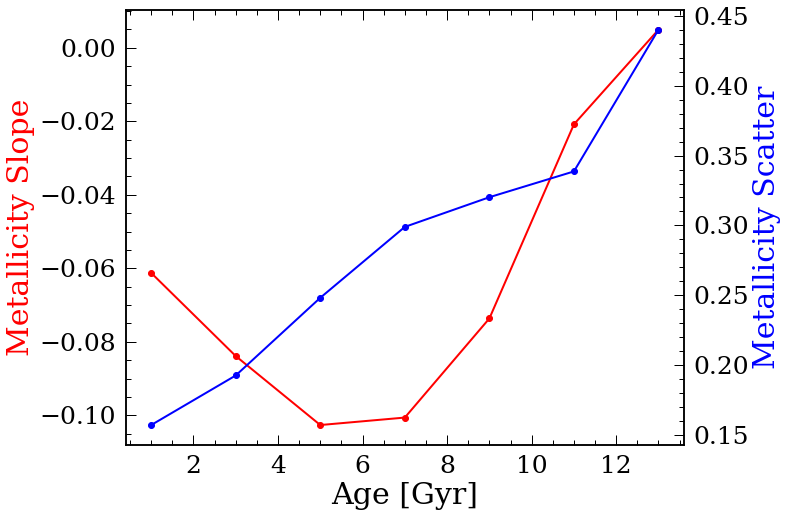

In [112]:
import warnings
warnings.filterwarnings('ignore')
monoage(sub['feh'].values, sub['R'].values, sub['age'].values)

ages, slopes, fehscatter = monoage_line(sub['feh'].values, sub['R'].values, sub['age'].values)

plt.figure(figsize=(10,8))
plt.plot(ages, slopes, 'r-o')
plt.xlabel('Age [Gyr]')
plt.ylabel('Metallicity Slope', color='r')

plt.twinx()
plt.plot(ages, fehscatter, 'b-o')
plt.ylabel('Metallicity Scatter', color='b')


# RVS DR3

In [113]:
rvs = pd.read_csv('DR3_age_rvs_mh.csv')

In [114]:
rvs = rvs.loc[(rvs['r']>0)&(rvs['r']<15)].reset_index(drop=True)
rvs = rvs.loc[abs(rvs['z']>0)].reset_index(drop=True)
len(rvs)

428707

Text(0, 0.5, 'Metallicity Scatter')

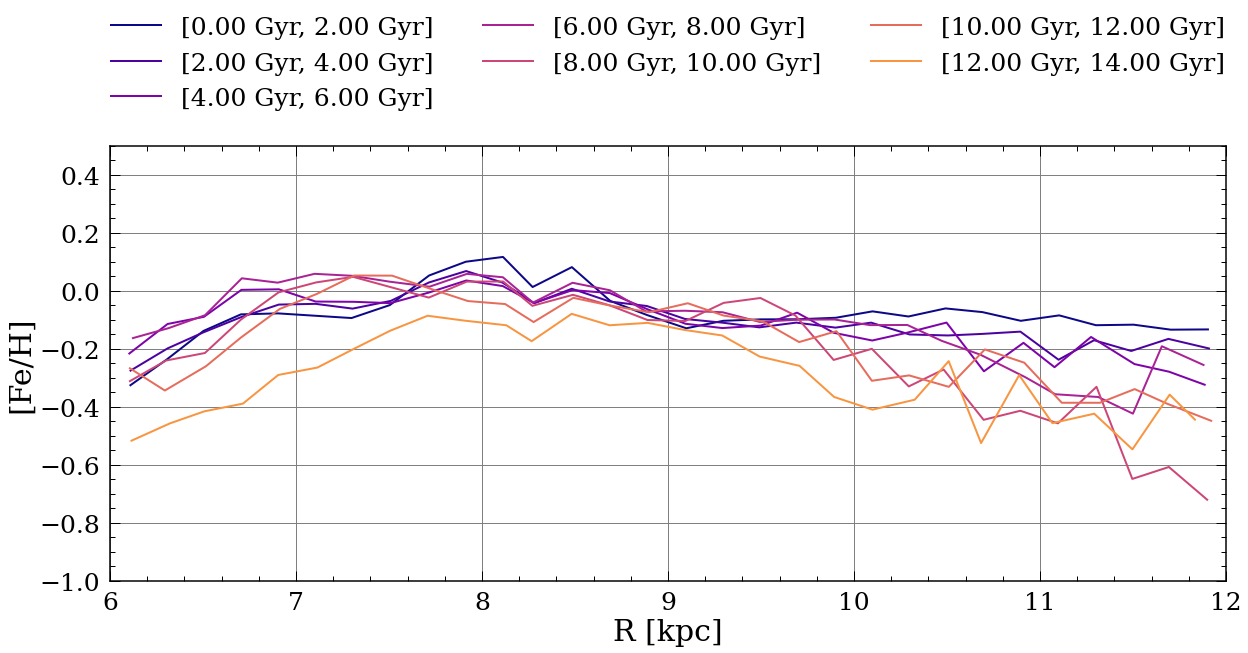

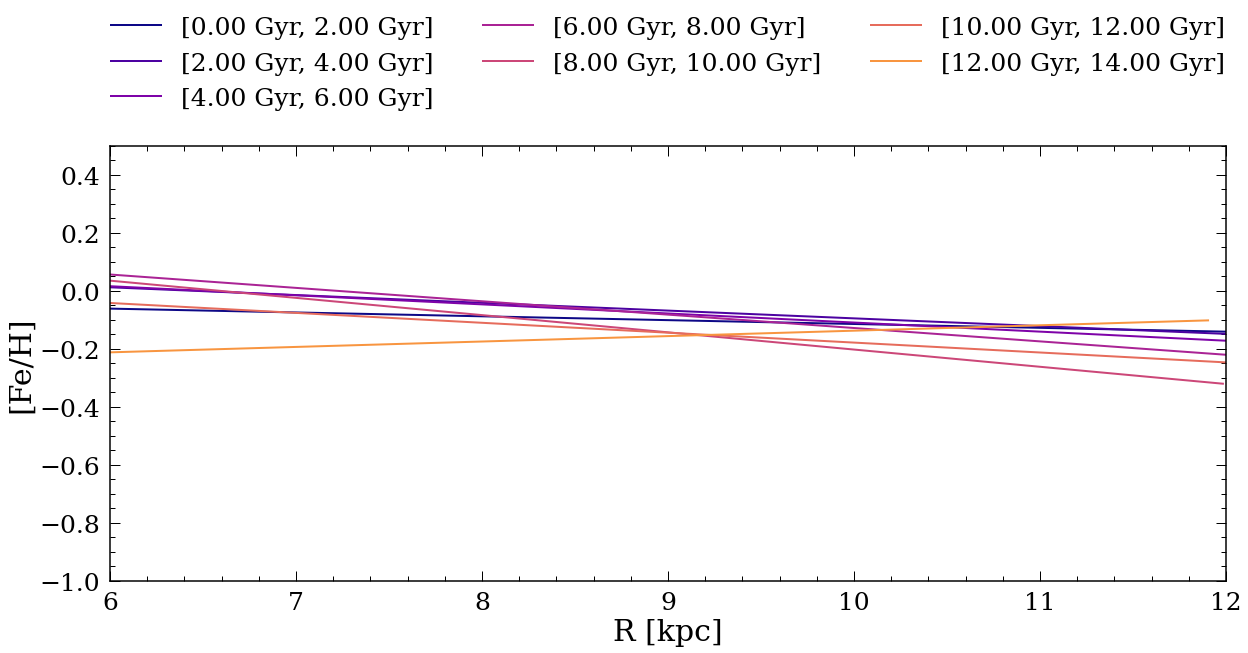

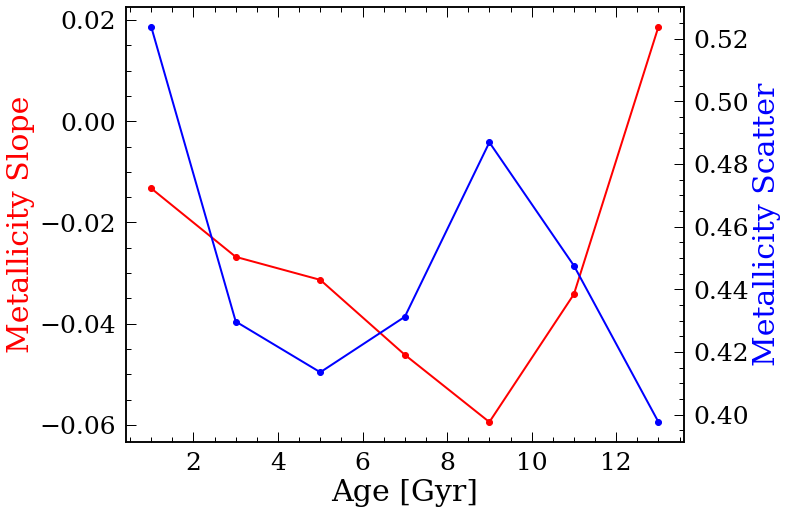

In [115]:

monoage(rvs['m_h_rvs'].values, rvs['r'].values, rvs['age'].values,xlims=[6,12],ylims=[-1,0.5])

ages, slopes, fehscatter = monoage_line(rvs['m_h_rvs'].values, rvs['r'].values, rvs['age'].values,xlims=[6,12],ylims=[-1,0.5])

plt.figure(figsize=(10,8))
plt.plot(ages, slopes, 'r-o')
plt.xlabel('Age [Gyr]')
plt.ylabel('Metallicity Slope', color='r')

plt.twinx()
plt.plot(ages, fehscatter, 'b-o')
plt.ylabel('Metallicity Scatter', color='b')